In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
from idealPendulum import IdealPendulum
import numpy as np

# hype parameter

maxIter  : int   = 500

model_name = 'EdSr'

fontsize = font_manager.FontProperties(size = 10)
tick_fontsize = font_manager.FontProperties(size = 8)
title_fontsize = font_manager.FontProperties(size = 8)
legned_fontsize = font_manager.FontProperties(size = 6)

row, col = 2, 2

fig = plt.figure(figsize=[20*col,15*row], dpi=400)

subgraph_item = 0 + ord('a') - 1

pic_idx = 0
item_pos = (-0.07, 1.15)

tight_layout_arg = dict(
    top=0.945,
    bottom=0.109,
    left=0.042,
    right=0.998,
    hspace=0.485,
    wspace=0.13
)

<Figure size 16000x12000 with 0 Axes>

100%|██████████| 200/200 [00:00<00:00, 779.76it/s]

(201,)


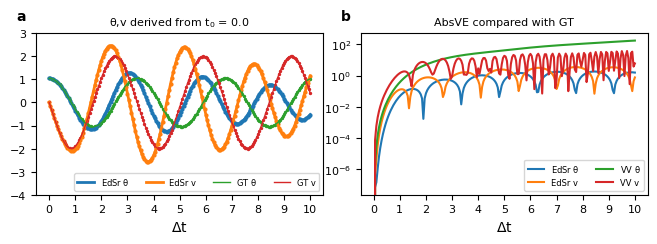

In [2]:
tStart   : float = 0.0
interval : float = 0.05
tStep    : int   = 200
maxIter  : int   = 1000

mass    : float = 1.0
radius  : float = 2.0
gravity : float = 2.0

pendulum = IdealPendulum(tStart, tStep, interval, mass, radius, gravity)

trajs, derror, verror, traderror, traverror = pendulum.init_loop(maxIter)
times = pendulum.times
print(times.shape)

timeIntv = times - times[0]

labelx = pendulum.q
labelv = pendulum.dqdt

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn generate trajectory and velocity derived from t(0)
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'$\mathrm{{\\theta}}$,v derived from $\\mathrm{{t_0}}$ = {tStart}', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r'$\mathrm{\Delta t}$', fontproperties = fontsize); 
plt.plot(timeIntv, trajs[:, 0], label = f'{model_name} $\\mathrm{{\\theta}}$', linewidth = 2)
plt.scatter(timeIntv, trajs[:, 0], s = 4)
plt.plot(timeIntv, trajs[:, 1], label = f'{model_name} v', linewidth = 2)
plt.scatter(timeIntv, trajs[:, 1], s = 4)

plt.plot(timeIntv, labelx, label = f'GT $\\mathrm{{\\theta}}$', linewidth = 1)
plt.scatter(timeIntv, labelx , s = 2)
plt.plot(timeIntv, labelv, label = r'GT v', linewidth = 1)
plt.scatter(timeIntv, labelv , s = 2)

plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3])

plt.xticks(np.linspace(timeIntv[0], timeIntv[-1], 11, dtype = np.int16))

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 4)

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn attn Absolute value of error
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'AbsVE compared with GT', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r'$\mathrm{\Delta t}$', fontproperties = fontsize); # plt.ylabel(r'$\theta$(degree)', fontproperties = fontsize)
plt.yscale('log')
plt.plot(timeIntv, derror, label = f'{model_name} $\\mathrm{{\\theta}}$')
plt.plot(timeIntv, verror, label = f'{model_name} v')
plt.plot(timeIntv, traderror, label = f'VV $\\mathrm{{\\theta}}$')
plt.plot(timeIntv, traverror, label = f'VV v')

plt.xticks(np.linspace(timeIntv[0], timeIntv[-1], 11, dtype = np.int16))

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 2)

100%|██████████| 200/200 [00:00<00:00, 1590.03it/s]

[10.    9.95  9.9   9.85  9.8   9.75  9.7   9.65  9.6   9.55  9.5   9.45
  9.4   9.35  9.3   9.25  9.2   9.15  9.1   9.05  9.    8.95  8.9   8.85
  8.8   8.75  8.7   8.65  8.6   8.55  8.5   8.45  8.4   8.35  8.3   8.25
  8.2   8.15  8.1   8.05  8.    7.95  7.9   7.85  7.8   7.75  7.7   7.65
  7.6   7.55  7.5   7.45  7.4   7.35  7.3   7.25  7.2   7.15  7.1   7.05
  7.    6.95  6.9   6.85  6.8   6.75  6.7   6.65  6.6   6.55  6.5   6.45
  6.4   6.35  6.3   6.25  6.2   6.15  6.1   6.05  6.    5.95  5.9   5.85
  5.8   5.75  5.7   5.65  5.6   5.55  5.5   5.45  5.4   5.35  5.3   5.25
  5.2   5.15  5.1   5.05  5.    4.95  4.9   4.85  4.8   4.75  4.7   4.65
  4.6   4.55  4.5   4.45  4.4   4.35  4.3   4.25  4.2   4.15  4.1   4.05
  4.    3.95  3.9   3.85  3.8   3.75  3.7   3.65  3.6   3.55  3.5   3.45
  3.4   3.35  3.3   3.25  3.2   3.15  3.1   3.05  3.    2.95  2.9   2.85
  2.8   2.75  2.7   2.65  2.6   2.55  2.5   2.45  2.4   2.35  2.3   2.25
  2.2   2.15  2.1   2.05  2.    1.95  1.9   1.85  1

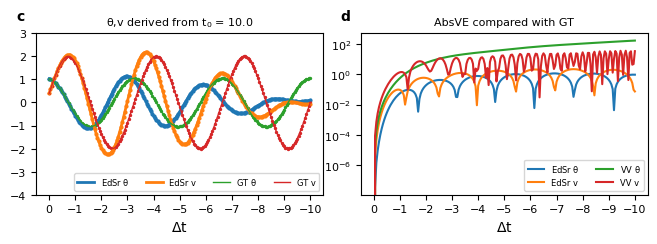

In [3]:
tStart   : float = 10.0
interval : float = -0.05
tStep    : int   = 200
maxIter  : int   = 500

mass    : float = 1.0
radius  : float = 2.0
gravity : float = 2.0

pendulum = IdealPendulum(tStart, tStep, interval, mass, radius, gravity)

trajs, derror, verror, traderror, traverror = pendulum.init_loop(maxIter)
times = pendulum.times
print(times)
timeIntv = times - times[0]

labelx = pendulum.q
labelv = pendulum.dqdt

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn generate trajectory and velocity derived from t(0)
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'$\mathrm{{\\theta}}$,v derived from $\\mathrm{{t_0}}$ = {tStart}', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r'$\mathrm{\Delta t}$', fontproperties = fontsize); 
plt.plot(timeIntv, trajs[:, 0], label = f'{model_name} $\\mathrm{{\\theta}}$', linewidth = 2)
plt.scatter(timeIntv, trajs[:, 0], s = 4)
plt.plot(timeIntv, trajs[:, 1], label = f'{model_name} v', linewidth = 2)
plt.scatter(timeIntv, trajs[:, 1], s = 4)
ax.xaxis.set_inverted(True)
plt.plot(timeIntv, labelx, label = f'GT $\\mathrm{{\\theta}}$', linewidth = 1)
plt.scatter(timeIntv, labelx , s = 2)
plt.plot(timeIntv, labelv, label = r'GT v', linewidth = 1)
plt.scatter(timeIntv, labelv , s = 2)

plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3])

plt.xticks(np.linspace(timeIntv[0], timeIntv[-1], 11, dtype = np.int16))

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 4)

# ! Picture idx
pic_idx += 1
subgraph_item += 1

ax = plt.subplot(row, col, pic_idx)
# attn attn Absolute value of error
plt.text(*item_pos, chr(subgraph_item), transform = ax.transAxes, fontsize = fontsize.get_size(), fontweight = 'bold', va = 'top', ha = 'left')
plt.title(f'AbsVE compared with GT', loc = 'center', fontproperties = title_fontsize)
plt.xlabel(r'$\mathrm{\Delta t}$', fontproperties = fontsize); # plt.ylabel(r'$\theta$(degree)', fontproperties = fontsize)
plt.yscale('log')
ax.xaxis.set_inverted(True)
plt.plot(timeIntv, derror, label = f'{model_name} $\\mathrm{{\\theta}}$')
plt.plot(timeIntv, verror, label = f'{model_name} v')
plt.plot(timeIntv, traderror, label = f'VV $\\mathrm{{\\theta}}$')
plt.plot(timeIntv, traverror, label = f'VV v')

plt.xticks(np.linspace(timeIntv[0], timeIntv[-1], 11, dtype = np.int16))

plt.tick_params(axis = 'both', labelsize = tick_fontsize.get_size())
if tight_layout_arg is not None:
    plt.subplots_adjust(**tight_layout_arg)
plt.legend(loc = 'lower right', fontsize = legned_fontsize.get_size(), ncol = 2)

In [4]:
# fig.tight_layout()
fig.show() # Qt5 backend

C:\Users\caohm\AppData\Local\Temp\ipykernel_9292\2228326575.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
